## Compiling and importing scripts

In [2]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import pickle
import seaborn as sns
import pathos.multiprocessing
import common.plotting_helper_functions as plt_help

In [3]:
def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

# Fig. 1 - p(stop) across test cases

In [4]:
data_dir = "../data/sims_test-cases_300/"
figure_dir = "../figures/"

In [5]:
datatables_go = loadresults_vars(data_dir+'datatables_total/datatables_total_go')
datatables_stn_06 = loadresults_vars(data_dir+'datatables_total/datatables_total_STN-only')
datatables_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_GPeA-only')
datatables_ispn = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN-only')
datatables_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+GPeA')
datatables_ispn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+GPeA')
datatables_ispn_stn = loadresults_vars(data_dir+'datatables_total/datatables_total_STN+iSPN')
datatables_ispn_stn_gpea = loadresults_vars(data_dir+'datatables_total/datatables_total_iSPN+STN+GPeA')

p_stop_go = loadresults_vars(data_dir+'p_stop_average/p_stop_average_go')
p_stop_stn_06 = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN-only')
p_stop_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_GPeA-only')
p_stop_ispn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN-only')
p_stop_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+GPeA')
p_stop_ispn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+GPeA')
p_stop_ispn_stn = loadresults_vars(data_dir+'p_stop_average/p_stop_average_STN+iSPN')
p_stop_ispn_stn_gpea = loadresults_vars(data_dir+'p_stop_average/p_stop_average_iSPN+STN+GPeA')

In [6]:
p_stop_total = pd.DataFrame()
p_stop_go = p_stop_go.rename({'p_stop': 'Go'}, axis=1)
p_stop_stn_06 = p_stop_stn_06.rename({'p_stop': 'STN-only'}, axis=1)
p_stop_gpea = p_stop_gpea.rename({'p_stop': 'GPeA-only'}, axis=1)
p_stop_ispn = p_stop_ispn.rename({'p_stop': 'iSPN-only'}, axis=1)
p_stop_stn_gpea = p_stop_stn_gpea.rename({'p_stop': 'STN+GPeA'}, axis=1)
p_stop_ispn_gpea = p_stop_ispn_gpea.rename({'p_stop': 'iSPN+GPeA'}, axis=1)
p_stop_stn_ispn = p_stop_ispn_stn.rename({'p_stop': 'STN+iSPN'}, axis=1)
p_stop_ispn_stn_gpea = p_stop_ispn_stn_gpea.rename({'p_stop': 'iSPN+STN+GPeA'}, axis=1)
p_stop_total = pd.concat([p_stop_go['Go'], p_stop_stn_06['STN-only'], 
                          p_stop_gpea['GPeA-only'], p_stop_ispn['iSPN-only'], 
                          p_stop_ispn_gpea['iSPN+GPeA'], p_stop_stn_gpea['STN+GPeA'],
                          p_stop_stn_ispn['STN+iSPN'], p_stop_ispn_stn_gpea['iSPN+STN+GPeA']], 
                          axis=1 )

In [7]:
zero = pd.DataFrame(np.zeros(10))
p_stop_total.insert(4, 'zero1', zero)
p_stop_total.insert(1, 'zero2', zero)
p_stop_total.insert(9, 'zero3', zero)

columns_titles = ['Go', 'zero1', 'STN-only', 'GPeA-only', 'iSPN-only', 'zero2', 'STN+GPeA', 'iSPN+GPeA', 'STN+iSPN', 'zero3', 'iSPN+STN+GPeA']
p_stop_total=p_stop_total.reindex(columns=columns_titles)

p_stop_total = p_stop_total.rename({'Go': 'No-Stim'}, axis=1)
p_stop_total = p_stop_total.rename({'GPeA-only': 'Arky-only'}, axis=1)
p_stop_total = p_stop_total.rename({'STN+GPeA': 'STN+Arky'}, axis=1)
p_stop_total = p_stop_total.rename({'iSPN+GPeA': 'iSPN+Arky'}, axis=1)
p_stop_total = p_stop_total.rename({'iSPN+STN+GPeA': 'iSPN+STN+Arky'}, axis=1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

STN-only v.s. Arky-only: t-test paired samples with Bonferroni correction, P_val=7.665e-06 stat=-1.131e+01
Arky-only v.s. iSPN-only: t-test paired samples with Bonferroni correction, P_val=1.963e-04 stat=-7.616e+00
STN-only v.s. iSPN-only: t-test paired samples with Bonferroni correction, P_val=5.887e-07 stat=-1.524e+01
iSPN-only v.s. iSPN+Arky: t-test paired samples with Bonferroni correction, P_val=2.376e-02 stat=3.841e+00
iSPN+Arky v.s. iSPN+STN+Arky: t-test paired samples with Bonferroni correction, P_val=2.035e-02 stat=-3.943e+00
STN+Arky v.s. iSPN+STN+Arky: t-test paired samples with Bonferroni correction, P_val=2.085e-04 stat=-7.558e+00


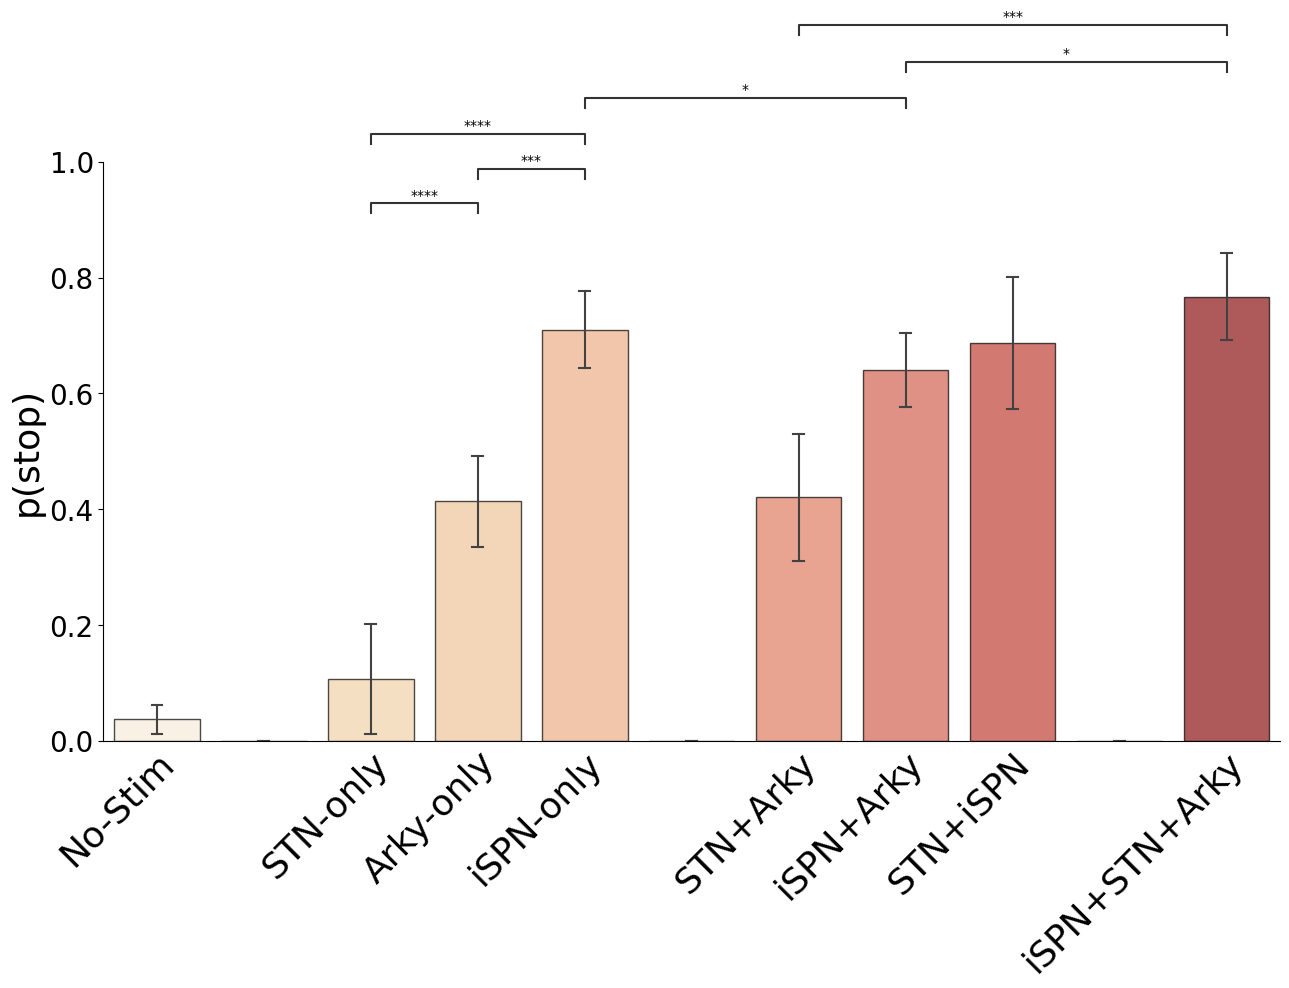

In [8]:
import seaborn as sns
import statannot
from statannot import add_stat_annotation

fig, ax = plt.subplots(1,1, figsize=(13,10), tight_layout=True)


col_order = ['No-Stim', 'zero1', 'STN-only', 'Arky-only', 'iSPN-only', 'zero2', 
              'STN+Arky', 'iSPN+Arky', 'STN+iSPN', 'zero3', 'iSPN+STN+Arky']
ax = sns.barplot(data=p_stop_total, errorbar="sd", alpha=.7, 
            capsize=.1, errwidth=1.5,  palette="OrRd", edgecolor='k', order=col_order)

test_results = add_stat_annotation(ax, data=p_stop_total, order=col_order,
                                   box_pairs=[("STN-only", "Arky-only"), 
                                              ("STN-only", "iSPN-only"),
                                              ("Arky-only", "iSPN-only"), 
                                              ("STN+Arky", "iSPN+STN+Arky"),  
                                              ("iSPN-only", "iSPN+Arky"), 
                                              ("iSPN+STN+Arky", "iSPN+Arky")],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=2)
test_results

ax.set_ylabel('p(stop)', fontsize=26.)
ax.set_ylim(0,1)
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=20)
plt.xticks(fontsize=26, rotation=45)

labels = ['No-Stim', '', 'STN-only', 'Arky-only', 'iSPN-only', '',  'STN+Arky', 'iSPN+Arky', 'STN+iSPN', '', 'iSPN+STN+Arky']
ax.set_xticklabels(labels, rotation=45, ha='right', rotation_mode='anchor')
ax.tick_params(length=0, axis='x')

plt.savefig(figure_dir+'fig1C', dpi=300)

# Fig. 2 - Arky stimulation 

In [9]:
data_dir = "../data/weights_analysis/lesion-experiments/"
figure_dir = "../figures/"

#### Arky stimulation

In [10]:
solutions = [0, 0.4]

firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'GPeAstim/network_data_GPeAstim_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA'] = np.round(firing['GPeA'].values, 4)

In [11]:
average_firing = pd.DataFrame(firing.groupby(['GPeA', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_off = pd.DataFrame()
firing_stim = pd.DataFrame()
firing_off = average_firing[:10]
firing_stim = average_firing[10:]
firing_off = pd.DataFrame(firing_off.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_stim = pd.DataFrame(firing_stim.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_stim, firing_off], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={0: "stim", 1: "control"})
firing_all = firing_all.drop('GPeA', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

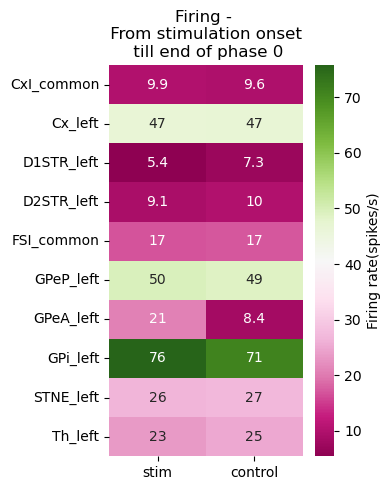

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0')

In [13]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['stim'].values - firing_all['control'].values)/firing_all['stim'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

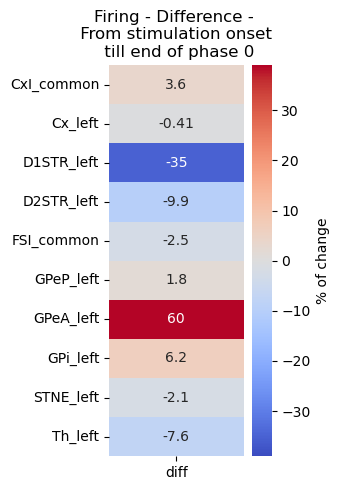

In [14]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-39, vmax=39, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig2A', dpi=200)

#### iSPN-dSPN manipulation

In [15]:
solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'iSPN-dSPN/network_data_iSPN-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['iSPN-dSPN'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['iSPN-dSPN'] = np.round(datatables['iSPN-dSPN'].values, 4)

In [16]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['iSPN-dSPN', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['iSPN-dSPN', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [17]:
temp = pd.DataFrame(columns=['seed', '0.28', '0.22',
                            '0.18', '0.12', '0.09', '0'])

temp['seed'] = np.arange(0, 10, 1)
temp['0.28'] = p_stop_average_wts.iloc[50:].p_stop.values
temp['0.22'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['0.18'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.12'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.09'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', '0.28', '0.22',
                            '0.18', '0.12', '0.09', '0'])

temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['0.28'] = rts_average_wts.iloc[50:].rt.values
temp_rt['0.22'] = rts_average_wts.iloc[40:50].rt.values
temp_rt['0.18'] = rts_average_wts.iloc[30:40].rt.values
temp_rt['0.12'] = rts_average_wts.iloc[20:30].rt.values
temp_rt['0.09'] = rts_average_wts.iloc[10:20].rt.values
temp_rt['0'] = rts_average_wts.iloc[0:10].rt.values

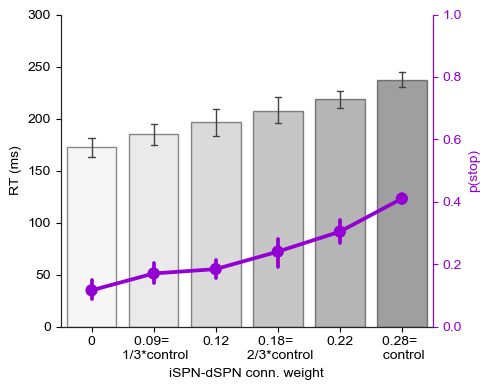

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order = ['0', '0.09', '0.12', '0.18', '0.22', '0.28']

sns.barplot(data=rts_average_wts, x='iSPN-dSPN', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1.,
            palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

ax1.set_xlabel('iSPN-dSPN conn. weight')
ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='iSPN-dSPN', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax2.set_xticklabels(['0', '0.09= \n 1/3*control', '0.12', '0.18= \n 2/3*control', '0.22', '0.28= \n control'])


ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')
plt.show()

plt.savefig(figure_dir+'fig2C', dpi=200)

In [19]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'iSPN-dSPN/network_data_iSPN-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['iSPN-dSPN'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['iSPN-dSPN'] = np.round(firing['iSPN-dSPN'].values, 4)

In [20]:
average_firing = pd.DataFrame(firing.groupby(['iSPN-dSPN', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_028 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_028 = average_firing[50:]
firing_0 = average_firing[0:10]
firing_028 = pd.DataFrame(firing_028.groupby(['iSPN-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['iSPN-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_028, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.28 - control"})
firing_all = firing_all.drop('iSPN-dSPN', axis=1)
firing_all = firing_all.T

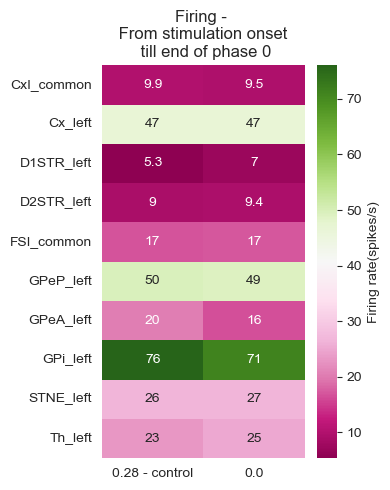

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') 

In [22]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['0.0'].values - firing_all['0.28 - control'].values)/firing_all['0.28 - control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

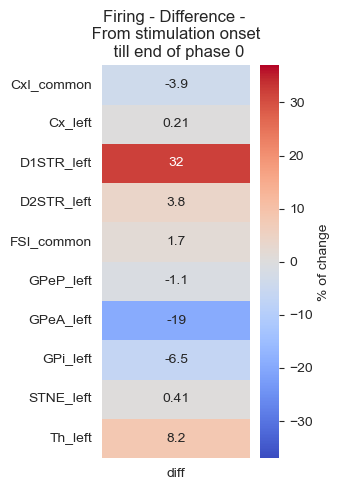

In [23]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-37, vmax=37, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig2B', dpi=200)

#### dSPN-iSPN manipulation

In [24]:
solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'dSPN-iSPN/network_data_dSPN-iSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['dSPN-iSPN'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['dSPN-iSPN'] = np.round(datatables['dSPN-iSPN'].values, 4)

In [25]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['dSPN-iSPN', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['dSPN-iSPN', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [26]:
temp = pd.DataFrame(columns=['seed', '0.28', '0.22',
                            '0.18', '0.12', '0.09', '0'])

temp['seed'] = np.arange(0, 10, 1)
temp['0.28'] = p_stop_average_wts.iloc[50:].p_stop.values
temp['0.22'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['0.18'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.12'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.09'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', '0.28', '0.22',
                            '0.18', '0.12', '0.09', '0'])

temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['0.28'] = rts_average_wts.iloc[50:].rt.values
temp_rt['0.22'] = rts_average_wts.iloc[40:50].rt.values
temp_rt['0.18'] = rts_average_wts.iloc[30:40].rt.values
temp_rt['0.12'] = rts_average_wts.iloc[20:30].rt.values
temp_rt['0.09'] = rts_average_wts.iloc[10:20].rt.values
temp_rt['0'] = rts_average_wts.iloc[0:10].rt.values

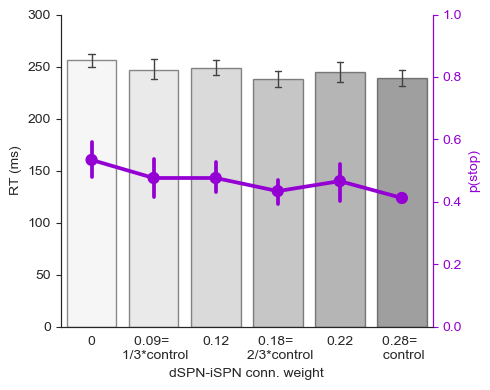

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order = ['0', '0.09', '0.12', '0.18', '0.22', '0.28']

sns.barplot(data=rts_average_wts, x='dSPN-iSPN', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1.,
            palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

ax1.set_xlabel('dSPN-iSPN conn. weight')
ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='dSPN-iSPN', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax2.set_xticklabels(['0', '0.09= \n 1/3*control', '0.12', '0.18= \n 2/3*control', '0.22', '0.28= \n control'])


ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')
plt.show()

plt.savefig(figure_dir+'fig2E', dpi=200)

In [28]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'dSPN-iSPN/network_data_dSPN-iSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['dSPN-iSPN'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['dSPN-iSPN'] = np.round(firing['dSPN-iSPN'].values, 4)

In [29]:
average_firing = pd.DataFrame(firing.groupby(['dSPN-iSPN', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_028 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_028 = average_firing[50:]
firing_0 = average_firing[0:10]
firing_028 = pd.DataFrame(firing_028.groupby(['dSPN-iSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['dSPN-iSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_028, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.28 - control"})
firing_all = firing_all.drop('dSPN-iSPN', axis=1)
firing_all = firing_all.T

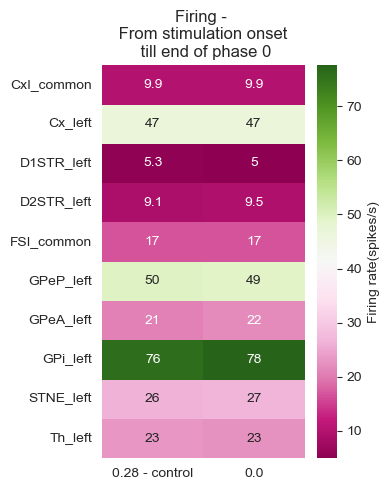

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') 

In [31]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['0.0'].values - firing_all['0.28 - control'].values)/firing_all['0.28 - control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

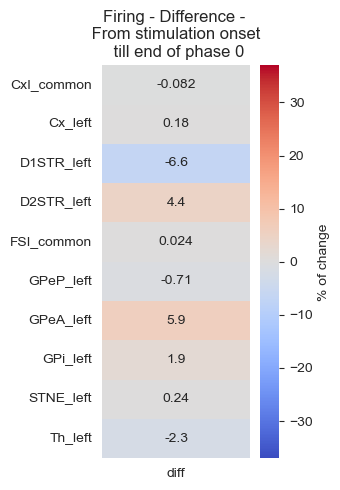

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-37, vmax=37, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig2D', dpi=200)

# Fig. 3 - control vs. lesion analysis

#### iSPN+STN stim - Arky off

In [33]:
solutions = [0, -0.8]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'STN+iSPNstim-GPeAoff/network_data_STN+iSPNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA'] = np.round(datatables['GPeA'].values, 4)

In [34]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [35]:
temp = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp['seed'] = np.arange(0, 10, 1)
temp['control'] = p_stop_average_wts.iloc[10:].p_stop.values
temp['lesion'] = p_stop_average_wts.iloc[:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['control'] = rts_average_wts.iloc[10:].rt.values
temp_rt['lesion'] = rts_average_wts.iloc[:10].rt.values

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=3.721e-01 stat=-9.394e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=1.634e-03 stat=-4.435e+00


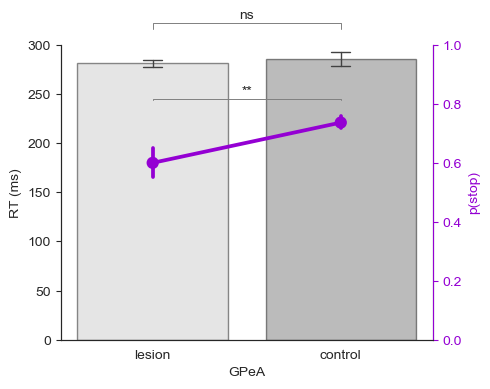

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order=['lesion', 'control']

sns.barplot(data=rts_average_wts, x='GPeA', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1., palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

test_results = add_stat_annotation(ax1, data=temp_rt, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=1, color='grey', linewidth=.7)

ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

test_results = add_stat_annotation(ax2, data=temp, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='inside', verbose=1, color='grey', linewidth=.7)


ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax2.set_xticklabels(['lesion', 'control'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')

plt.show()
plt.savefig(figure_dir+'fig3B', dpi=200)

In [37]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'STN+iSPNstim-GPeAoff/network_data_STN+iSPNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA'] = np.round(firing['GPeA'].values, 4)

In [38]:
average_firing = pd.DataFrame(firing.groupby(['GPeA', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_off = pd.DataFrame()
firing_on = pd.DataFrame()
firing_off = average_firing[:10]
firing_on = average_firing[10:]
firing_off = pd.DataFrame(firing_off.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_on = pd.DataFrame(firing_on.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_on, firing_off], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "GPeA-off", 0: "control"})
firing_all = firing_all.drop('GPeA', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

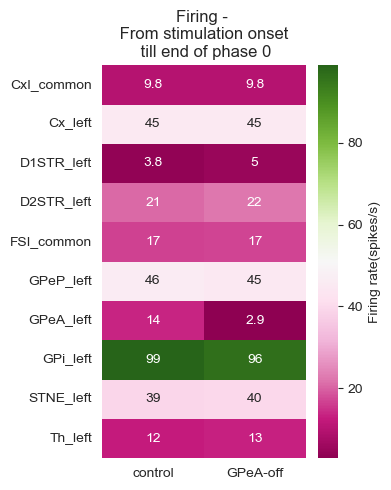

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') 

In [40]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['GPeA-off'].values - firing_all['control'].values)/firing_all['control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

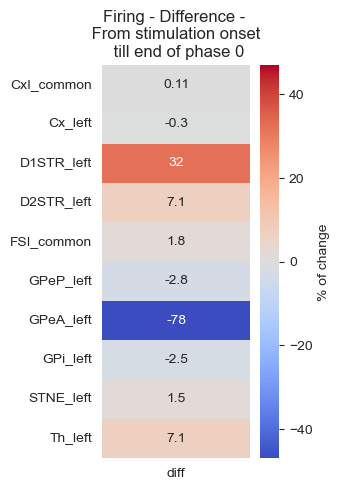

In [41]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-47, vmax=47, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig3A', dpi=200)

#### iSPN stim - Arky off

In [42]:
solutions = [0, -0.8]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'iSPNstim-GPeAoff/network_data_iSPNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA'] = np.round(datatables['GPeA'].values, 4)

In [43]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [44]:
temp = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp['seed'] = np.arange(0, 10, 1)
temp['control'] = p_stop_average_wts.iloc[10:].p_stop.values
temp['lesion'] = p_stop_average_wts.iloc[:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['control'] = rts_average_wts.iloc[10:].rt.values
temp_rt['lesion'] = rts_average_wts.iloc[:10].rt.values

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=6.506e-02 stat=-2.101e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=6.368e-05 stat=-6.994e+00


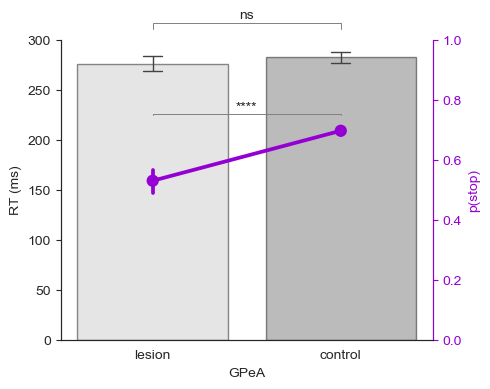

<Figure size 640x480 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order=['lesion', 'control']

sns.barplot(data=rts_average_wts, x='GPeA', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1., palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

test_results = add_stat_annotation(ax1, data=temp_rt, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=1, color='grey', linewidth=.7)

ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

test_results = add_stat_annotation(ax2, data=temp, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='inside', verbose=1, color='grey', linewidth=.7)


ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax2.set_xticklabels(['lesion', 'control'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')

plt.show()
plt.savefig(figure_dir+'fig3D', dpi=200)

In [46]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'iSPNstim-GPeAoff/network_data_iSPNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA'] = np.round(firing['GPeA'].values, 4)

In [47]:
average_firing = pd.DataFrame(firing.groupby(['GPeA', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_off = pd.DataFrame()
firing_on = pd.DataFrame()
firing_off = average_firing[:10]
firing_on = average_firing[10:]
firing_off = pd.DataFrame(firing_off.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_on = pd.DataFrame(firing_on.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_on, firing_off], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "GPeA-off", 0: "control"})
firing_all = firing_all.drop('GPeA', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

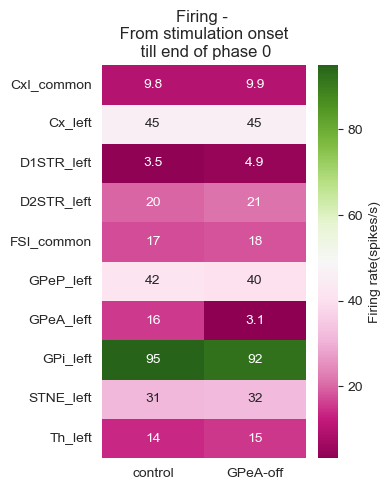

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') 

In [49]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['GPeA-off'].values - firing_all['control'].values)/firing_all['control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

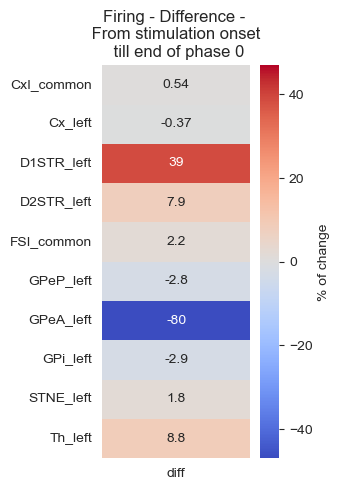

In [50]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-47, vmax=47, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig3C', dpi=200)

#### STN stim - Arky off

In [51]:
solutions = [0, -0.4]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'STNstim-GPeAoff/network_data_STNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA'] = np.round(datatables['GPeA'].values, 4)

In [52]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [53]:
temp = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp['seed'] = np.arange(0, 10, 1)
temp['control'] = p_stop_average_wts.iloc[10:].p_stop.values
temp['lesion'] = p_stop_average_wts.iloc[:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', 'control', 'lesion'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['control'] = rts_average_wts.iloc[10:].rt.values
temp_rt['lesion'] = rts_average_wts.iloc[:10].rt.values

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=8.060e-06 stat=-9.064e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

lesion v.s. control: t-test paired samples with Bonferroni correction, P_val=1.535e-04 stat=-6.228e+00


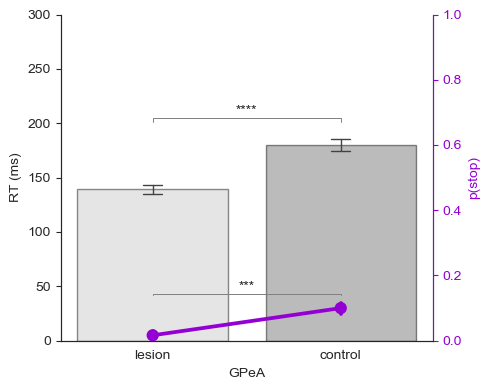

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order=['lesion', 'control']

sns.barplot(data=rts_average_wts, x='GPeA', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1., palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

test_results = add_stat_annotation(ax1, data=temp_rt, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='outside', verbose=1, color='grey', linewidth=.7)

ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

test_results = add_stat_annotation(ax2, data=temp, order=col_order,
                                   box_pairs=[('control', 'lesion')],
                                   test='t-test_paired', text_format='star',
                                   loc='inside', verbose=1, color='grey', linewidth=.7)


ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
ax2.set_xticklabels(['lesion', 'control'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')

plt.show()
plt.savefig(figure_dir+'fig3F', dpi=200)

In [55]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'STNstim-GPeAoff/network_data_STNstim-GPeAoff_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA'] = np.round(firing['GPeA'].values, 4)

In [56]:
average_firing = pd.DataFrame(firing.groupby(['GPeA', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_off = pd.DataFrame()
firing_on = pd.DataFrame()
firing_off = average_firing[:10]
firing_on = average_firing[10:]
firing_off = pd.DataFrame(firing_off.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_on = pd.DataFrame(firing_on.groupby(['GPeA'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_on, firing_off], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "GPeA-off", 0: "control"})
firing_all = firing_all.drop('GPeA', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

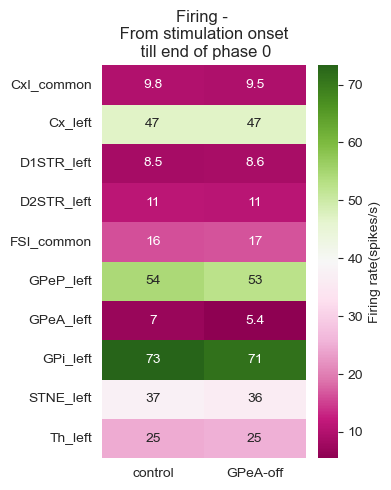

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) 
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') 

In [58]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['GPeA-off'].values - firing_all['control'].values)/firing_all['control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

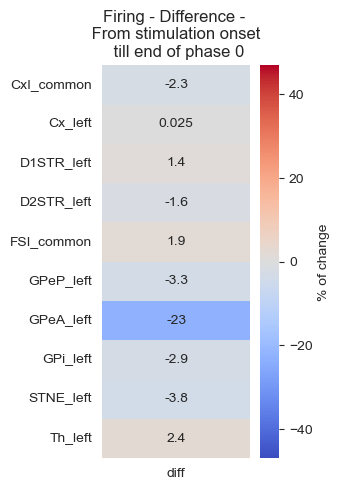

In [59]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-47, vmax=47, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig3E', dpi=200)

# Fig. 4 - Arky-STR study

In [60]:
data_dir = "../data/weights_analysis/lesion-experiments/"
figure_dir = "../figures/"

#### Arky-iSPN manipulation

In [61]:
solutions = [0.12, 0.08, 0.04, 0.02, 0]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'GPeA-iSPN/network_data_GPeA-iSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA-iSPN'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        #temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA-iSPN'] = np.round(datatables['GPeA-iSPN'].values, 4)

In [62]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA-iSPN', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA-iSPN', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [63]:
temp = pd.DataFrame(columns=['seed', '0.12', '0.08',
                            '0.04', '0.02', '0'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.12'] = p_stop_average_wts.iloc[40:].p_stop.values
temp['0.08'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.04'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.02'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', '0.12', '0.08',
                            '0.04', '0.02', '0'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['0.12'] = rts_average_wts.iloc[40:50].rt.values
temp_rt['0.08'] = rts_average_wts.iloc[30:40].rt.values
temp_rt['0.04'] = rts_average_wts.iloc[20:30].rt.values
temp_rt['0.02'] = rts_average_wts.iloc[10:20].rt.values
temp_rt['0'] = rts_average_wts.iloc[0:10].rt.values

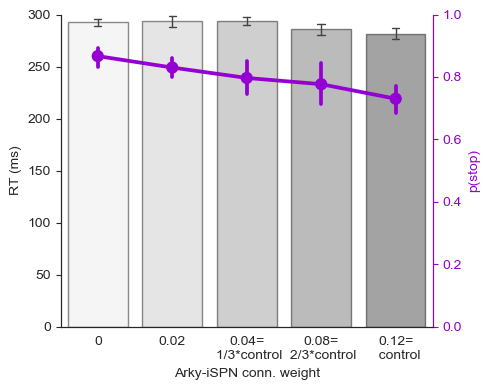

<Figure size 640x480 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation
#from statannotcolor.Annotator import Annotator


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order = ['0', '0.02', '0.04', '0.08', '0.12']


sns.barplot(data=rts_average_wts, x='GPeA-iSPN', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1.,
            palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

ax1.set_xlabel('Arky-iSPN conn. weight')
ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA-iSPN', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)

ax1.set_xticklabels(['0', '0.02', '0.04=\n 1/3*control', '0.08=\n 2/3*control', '0.12=\n  control'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet') #brown
ax2.tick_params(axis='y', colors='darkviolet')

plt.show()
plt.savefig(figure_dir+'fig4B', dpi=200)

In [65]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']


for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'GPeA-iSPN/network_data_GPeA-iSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']

        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA-iSPN'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA-iSPN'] = np.round(firing['GPeA-iSPN'].values, 4)

In [66]:
average_firing = pd.DataFrame(firing.groupby(['GPeA-iSPN', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_012 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_012 = average_firing[40:]
firing_0 = average_firing[0:10]
firing_012 = pd.DataFrame(firing_012.groupby(['GPeA-iSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['GPeA-iSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_012, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.12 - control"})
firing_all = firing_all.drop('GPeA-iSPN', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

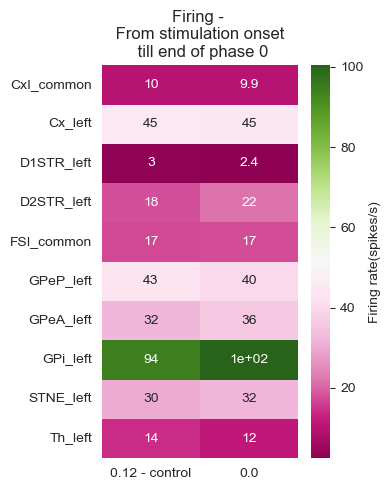

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) #4
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') #

In [69]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['0.0'].values - firing_all['0.12 - control'].values)/firing_all['0.12 - control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

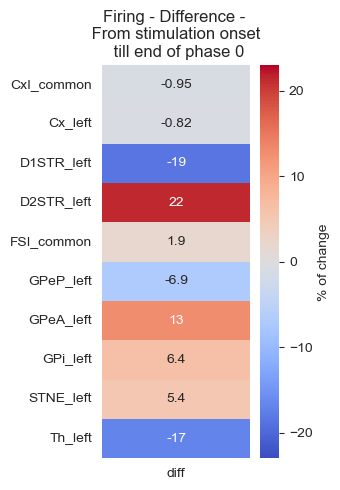

In [70]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-23, vmax=23, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig4A', dpi=200)

#### Arky-dSPN manipulation

In [71]:
solutions = [0.32, np.round(0.32*2/3, 2), np.round(0.32*1/3, 2), 0.02, 0]

datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 

    net = pickle.load(open(data_dir+'GPeA-dSPN/network_data_GPeA-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['GPeA'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        #temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables = pd.concat([datatables, temp], ignore_index = False)

datatables['GPeA'] = np.round(datatables['GPeA'].values, 4)

In [72]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)

rts_average_wts = pd.DataFrame(datatables.groupby(['GPeA', 'seed'])['decisionduration'].mean()).reset_index()
rts_average_wts = rts_average_wts.rename({'decisionduration': 'rt'}, axis=1)

In [73]:
temp = pd.DataFrame(columns=['seed', '0.32', '0.21',
                            '0.11', '0.02', '0'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.32'] = p_stop_average_wts.iloc[40:].p_stop.values
temp['0.21'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.11'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.02'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values

temp_rt = pd.DataFrame(columns=['seed', '0.32', '0.21',
                            '0.11', '0.02', '0'])
temp_rt['seed'] = np.arange(0, 10, 1)
temp_rt['0.32'] = rts_average_wts.iloc[40:50].rt.values
temp_rt['0.21'] = rts_average_wts.iloc[30:40].rt.values
temp_rt['0.11'] = rts_average_wts.iloc[20:30].rt.values
temp_rt['0.02'] = rts_average_wts.iloc[10:20].rt.values
temp_rt['0'] = rts_average_wts.iloc[0:10].rt.values

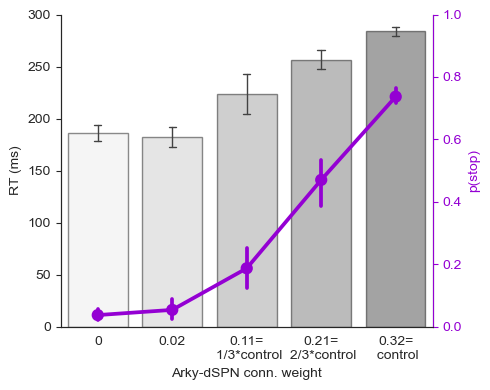

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statannot import add_stat_annotation


fig, ax1 = plt.subplots(figsize=(5, 4), tight_layout=True)
sns.set_style("white")

col_order = ['0', '0.02', '0.11', '0.21', '0.32']

sns.barplot(data=rts_average_wts, x='GPeA', y='rt', errorbar=('ci', 95),
            capsize=.1, errwidth=1.,
            palette="Greys", edgecolor='k', alpha=0.45, ax=ax1)

ax1.set_xlabel('Arky-dSPN conn. weight')
ax1.set_ylabel('RT (ms)')

ax2 = ax1.twinx()
sns.pointplot(data=p_stop_average_wts, x='GPeA', y='p_stop', 
              errorbar=('ci', 95), color='darkviolet', ax=ax2)

ax2.set_ylim(0,1)
ax1.set_ylim(0,300)
ax2.set_ylabel('p(stop)')

ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)

ax1.set_xticklabels(['0', '0.02','0.11=\n 1/3*control', '0.21=\n 2/3*control', '0.32=\n control'])

ax2.spines['right'].set_color('darkviolet')
ax2.yaxis.label.set_color('darkviolet')
ax2.tick_params(axis='y', colors='darkviolet')

plt.savefig(figure_dir+'fig4D', dpi=200)
plt.show()

In [75]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']


for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'GPeA-dSPN/network_data_GPeA-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime']

        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"] = [*temp["reaction_time"], dt-ss]  
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch] = [*temp[ip_ch], dat_slice.mean()]  

        temp = pd.DataFrame(temp)
        temp['GPeA-dSPN'] = solutions[i]
        temp['seed'] = j
        firing = pd.concat([firing, temp], ignore_index=True)
        
firing['GPeA-dSPN'] = np.round(firing['GPeA-dSPN'].values, 4)

In [76]:
average_firing = pd.DataFrame(firing.groupby(['GPeA-dSPN', 'seed'])[['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_032 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_032 = average_firing[40:]
firing_0 = average_firing[0:10]
firing_032 = pd.DataFrame(firing_032.groupby(['GPeA-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['GPeA-dSPN'])[['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left']].mean()).reset_index()

firing_all = pd.DataFrame()
firing_all = pd.concat([firing_032, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.32 - control"})
firing_all = firing_all.drop('GPeA-dSPN', axis=1)
firing_all = firing_all.T

Text(0.5, 1.0, 'Firing - \n From stimulation onset \n till end of phase 0')

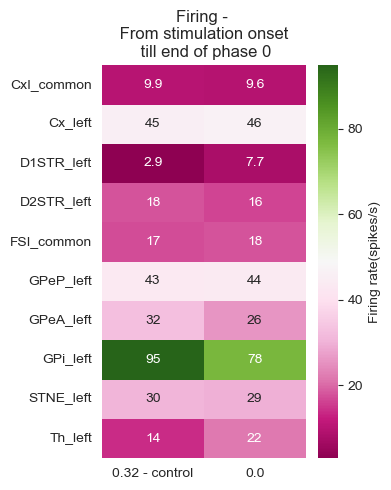

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) #4
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') #

In [78]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['0.0'].values - firing_all['0.32 - control'].values)/firing_all['0.32 - control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})

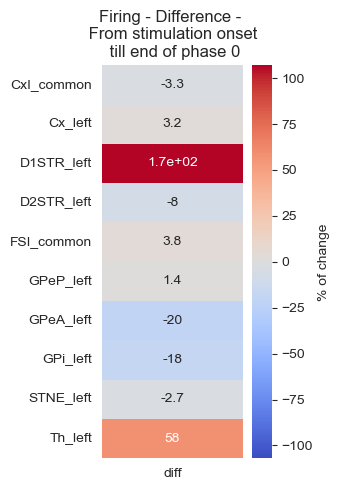

In [79]:
fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-107, vmax=107, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})

plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
plt.savefig(figure_dir+'fig4C', dpi=200)

#### Arky-STR manipulation

In [80]:
data_dir = "../data/weights_analysis/GPeA_dSPN-iSPN/"
figure_dir = "../figures/"

In [81]:
solutions_dSPN = np.arange(0.02, 0.44, 0.05) 
solutions_iSPN =  np.arange(0.02, 0.64, 0.05)
datatables = pd.DataFrame()

for i in np.arange(len(solutions_dSPN)):
    
    for k in np.arange(len(solutions_iSPN)):
    
        net = pickle.load(open(data_dir+'network_data_GPeA-dSPN-iSPN_iSPN+STN+GPeA_'+str(i)+'_'+str(k), 'rb'))

        for j in np.arange(len(net)):

            temp = net[j]['datatables']
            temp['GPeA-dSPN'] = solutions_dSPN[i]
            temp['GPeA-iSPN'] = solutions_iSPN[k]
            temp['num_stops'] = [1 if x == 'stop' else 0 for x in temp.decision]
            temp['thread'] = j
            #temp['p_stop'] = sum(temp['num_stops'].values/50)
            datatables = pd.concat([datatables, temp], ignore_index = False) #True

datatables['GPeA-dSPN'] = np.round(datatables['GPeA-dSPN'].values, 3)
datatables['GPeA-iSPN'] = np.round(datatables['GPeA-iSPN'].values, 3)

p_stop_average = pd.DataFrame(datatables.groupby(['GPeA-dSPN', 'GPeA-iSPN'])['num_stops'].mean()).reset_index()
p_stop_average = p_stop_average.rename({'num_stops': 'p_stop'}, axis=1)
p_stop_table = p_stop_average.pivot_table(index='GPeA-iSPN', columns='GPeA-dSPN', values='p_stop')
p_stop_reverse = p_stop_table.iloc[::-1]

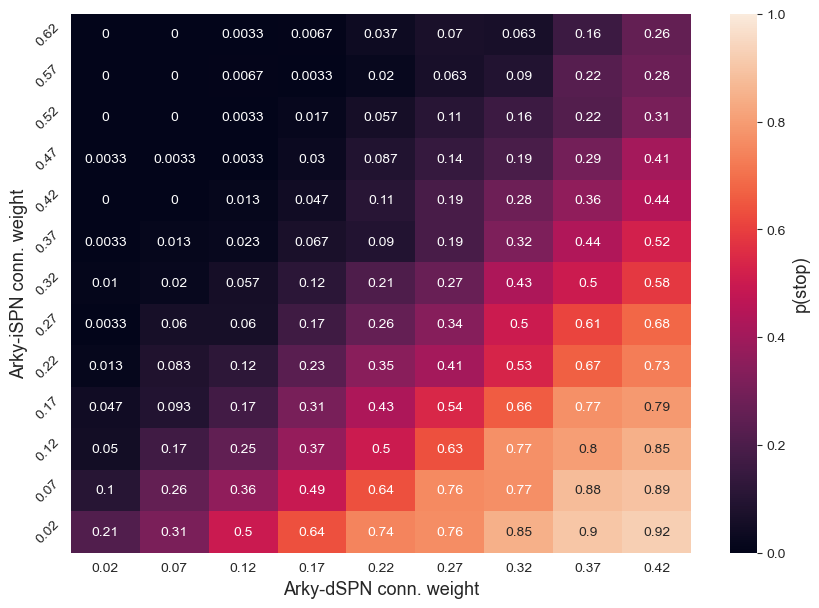

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 7))

sns.heatmap(p_stop_reverse, cbar_kws={'label': 'p(stop)'}, 
           vmin=0, vmax=1, annot=True)

ax.tick_params(axis='y', labelrotation=45)
ax.set_xlabel('Arky-dSPN conn. weight', fontsize=13.)
ax.set_ylabel('Arky-iSPN conn. weight', fontsize=13.)
ax.figure.axes[-1].yaxis.label.set_size(13.)

plt.savefig(figure_dir+'fig4E', dpi=300)